# Title

**Exercise 1 - Regularization and Decision Boundaries in Logistic Regression**

# Description

The goal of the exercise is to produce a plot similar to the one given below, by performing classification predictions on a logistic regression model .

<img src="img/reg_db_log_reg.png" style="width: 500px;">

# Instructions: 
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit logistic regression models and interpret results
- Compute the accuracy of the model.
- Plot the classification boundaries against the two predictors
- Fit an untuned regularized logistic regression model and compare the classification boundary

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.accuracy_score()</a> : Accuracy classification score

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_20571/369837569.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
heart = pd.read_csv('data/heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
#heart.head()
heart.describe()

(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [3]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

**Q1.1** Below we fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates, and interpret general trends.

In [8]:
degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])
y_train = heart_train['AHD']


logit1 = LogisticRegression(penalty='none', max_iter = 5000).fit(X_train1, y_train)

print("Logistic Regression Estimated Betas:",
      logit1.coef_,logit1.intercept_)


Logistic Regression Estimated Betas: [[ 0.02585431 -0.03884871]] [4.32578029]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


*your interpretation here*
- The coefficient for 'Age' is approximately 0.0259.
- The coefficient for 'MaxHR' is approximately -0.0388.
- The intercept is approximately 4.326.


**Intercept (4.326):**
- The intercept represents the log-odds of the positive class when all predictors are zero.
- To get the odds, you can exponentiate the intercept: odds = exp(4.326).
- The odds represent the ratio of the probability of the positive class to the probability of the negative class when all predictors are zero.

**Coefficient for 'Age' (0.0259):**
- For a one-unit increase in 'Age', the log-odds of the positive class increase by approximately 0.0259.
- To get the odds ratio for 'Age', you can exponentiate the coefficient: odds_ratio_age = exp(0.0259).
- The odds ratio represents how the odds change for a one-unit increase in 'Age'.

**Coefficient for 'MaxHR' (-0.0388):**
- For a one-unit increase in 'MaxHR', the log-odds of the positive class decrease by approximately 0.0388.
- To get the odds ratio for 'MaxHR', you can exponentiate the coefficient: odds_ratio_maxhr = exp(-0.0388).

**Q1.1** Fit an unregularized 4th order polynomial (with interactions) logistic regression model (`logit4`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates.

In [9]:
### edTest(test_logit4) ###

degree = 4
predictors = ['Age','MaxHR']

X_train4 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])

logit4 = LogisticRegression(penalty='none', max_iter = 5000).fit(X_train4, y_train)

print("Logistic Regression Estimated Betas:",
      logit4.coef_,logit4.intercept_)


Logistic Regression Estimated Betas: [[ 1.80297828e-09  2.51544560e-09  7.92196863e-08  1.11462599e-07
   1.12714494e-07  2.66496761e-06  3.79442517e-06  4.27015048e-06
  -5.78192579e-07  2.40665184e-06 -3.98115563e-06  2.18654079e-06
  -5.15431535e-07  3.79309018e-08]] [3.75301654e-11]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


**Q1.2** Evaluate the models based on misclassification rate in both the test set. 

In [11]:
### edTest(test_misclass) ###

######
# your code here
######

predictors = ['Age','MaxHR']
X_test1 = PolynomialFeatures(degree=1,include_bias=False).fit_transform(heart_test[predictors])
X_test4 = PolynomialFeatures(degree=4,include_bias=False).fit_transform(heart_test[predictors])
y_test = heart_test['AHD']

# use logit.score()
misclass_logit1 = logit1.score(X_test1, y_test)
misclass_logit4 = logit4.score(X_test4, y_test)

print("Overall misclassification rate in test for logit1:",misclass_logit1)
print("Overall misclassification rate in test for logit4:",misclass_logit4)


Overall misclassification rate in test for logit1: 0.7252747252747253
Overall misclassification rate in test for logit4: 0.6703296703296703


The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [13]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2))

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)


yhat1 = logit1.predict(X_dummy)


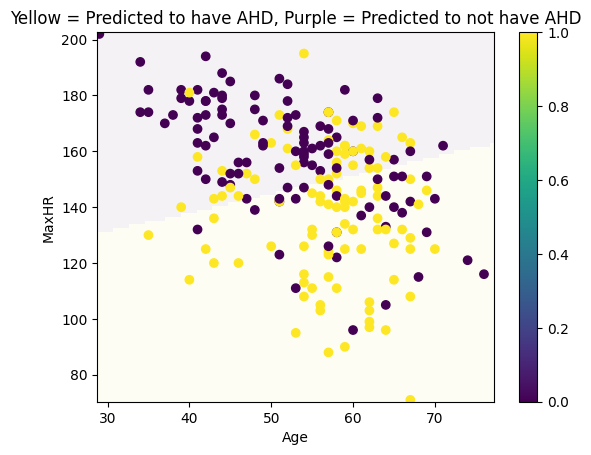

In [14]:

plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05)
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

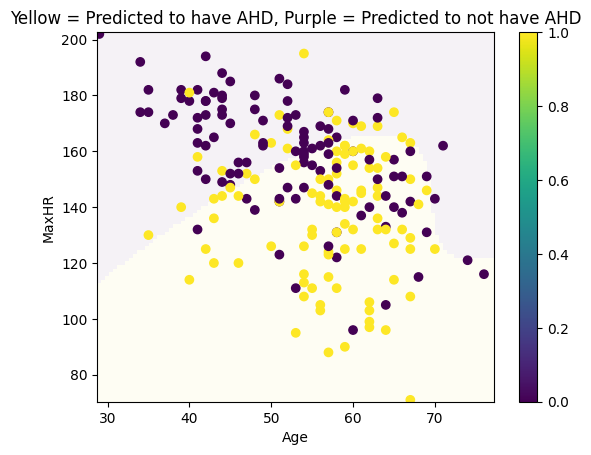

In [15]:
#Perform the same calculation above, but for the 4th order polynomial

X_dummy = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.05)
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()


**Q1.3** Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?

*your answer here*
The second model is more likely to overfit. Regularization would potentially reduce overfitting, as it introduces some "penalty" to the result.

**Q1.4** Fit a ridge-like Logistic Regression model with `C=0.0001` on the 4th order polynomial as before.  Compare this regularized model with the unregularized one by using the classification boundary.

In [16]:
### edTest(test_ridge) ###
logit_ridge = LogisticRegression(penalty='l2', C=0.0001, max_iter = 5000).fit(X_test4, y_test)


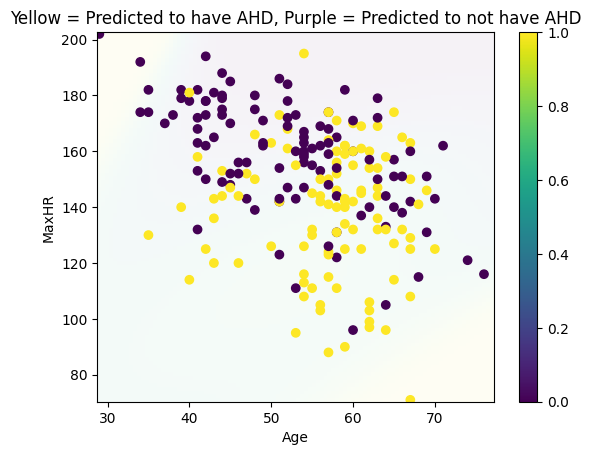

In [17]:

#yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1]
yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1]

plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

*your answer here*